In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go

In [2]:
emp_df = pd.read_excel("case_study.xlsx")
emp_df.shape

(1048575, 24)

In [3]:
emp_df.head()

,CustomerHash,OrderHash,Date_Order,Customer_Age,Gender,Account_Age,AffinityProductGender,Category_Reporting,Genre,ClientType,...,Pieces_Ordered,Pieces_Outbound,Pieces_Returns,Pieces_Fulfilled,OrderValue,Revenue_Goods,Delivery_Value,Return_Value,Discount_Total,OrderProfit
0,0x1E1626FECA5B3D07C5BD9809E1C529E64AA416CC,0x7BFC6D3AF3CCB5292515B773D69DC5D84DA7CD60,2020-11-21,33.0,Woman,0,Female,Fashion / Private label - Apparel,Private label,app,...,2,2.0,NaN,2.0,24.3363,24.34,24.34,NaN,-11.85,10.2251
1,0x0A6614AADFF1B528160D2FA0F986391D4FE8AF9E,0xE83E9EBAED365686CEFF9F4F6DF278E9DA35B4A6,2020-03-26,42.0,Woman,4,Unisex,Music - Apparel,Merchandise - Music,mobile,...,1,1.0,NaN,1.0,21.0000,21.00,21.00,NaN,0.00,7.0450
2,0xFA7DAAD0DE71512AE880D307C5AD3FD2940ABAB7,0x9C9784A1194B7DD4A76B0EAD1D144631B2CD1662,2020-04-19,29.0,Woman,1,Female,Entertainment - Apparel,Merchandise - Film & TV,desktop,...,4,4.0,-2.0,2.0,86.3530,42.00,86.36,-44.36,-18.64,16.0117
3,0x19DC7A03794164D3CA88A70FA80EF5AA6E2A8479,0x8BFAE5CA7ED52A5310DA271570E91826B467A19E,2020-10-01,54.0,Man,11,Female,Fashion / Private label - Apparel,Private label,desktop,...,1,1.0,-1.0,0.0,41.9741,0.00,41.97,-41.97,-1.12,-8.0409
4,0x93EE384997774E090DEF62C2B592EF5E9330C714,0xF122A416F2B14C8D7CCA79F4FA623CAEE5671EEC,2021-02-14,39.0,Woman,0,Female,Fashion / 3rd Party - Apparel,3rd Party Brands,mobile,...,5,5.0,NaN,5.0,115.5630,115.56,115.56,NaN,-28.90,59.2625


In [230]:
round(100 *emp_df.isna().sum() / emp_df.shape[0], 2).to_frame()

,0
CustomerHash,0.00
OrderHash,0.00
Date_Order,0.00
Customer_Age,29.07
Gender,0.00
Account_Age,0.00
AffinityProductGender,0.00
Category_Reporting,0.00
Genre,0.00
ClientType,1.04


In [5]:
emp_df["CustomerHash"].nunique(), emp_df["OrderHash"].nunique()

(666665, 1048575)

<AxesSubplot:>

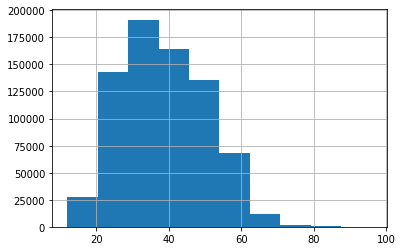

In [6]:
emp_df["Customer_Age"].hist()

In [7]:
emp_df["Gender"].value_counts()

Woman        508399
Man          346434
Undefined    193735
UNKNOWN           7
Name: Gender, dtype: int64

<AxesSubplot:>

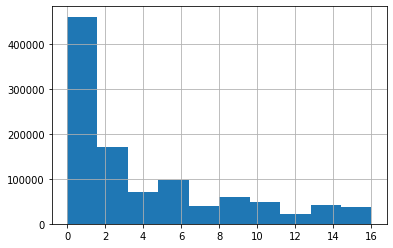

In [8]:
emp_df["Account_Age"].hist()

In [9]:
emp_df["AffinityProductGender"].value_counts()

Female    403786
Male      368865
Unisex    275924
Name: AffinityProductGender, dtype: int64

In [10]:
emp_df["Category_Reporting"].value_counts()

Fashion / 3rd Party - Apparel        193533
Entertainment - Apparel              162271
Music - Apparel                      156649
Fashion / Private label - Apparel    144019
Entertainment - Accessories           77802
Fashion - Accessories                 66367
Media                                 60359
Funshirts&Hoodies - Apparel           58476
BSC Membership                        53048
Music - Accessories                   24371
Gaming - Apparel                      23159
Gaming - Accessories                  14718
Warner D2C                            13554
Freebies                                249
Name: Category_Reporting, dtype: int64

In [11]:
emp_df["Genre"].value_counts()

3rd Party Brands           245470
Merchandise - Music        239871
Merchandise - Film & TV    213965
Private label              146226
Merchandise - Fun           70698
Other                       53298
Merchandise - Games         37877
Merchandise - Other         27616
Warner D2C                  13554
Name: Genre, dtype: int64

In [12]:
emp_df["ClientType"].value_counts()

desktop    424899
mobile     403867
app        208901
Name: ClientType, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Customer_Age'>

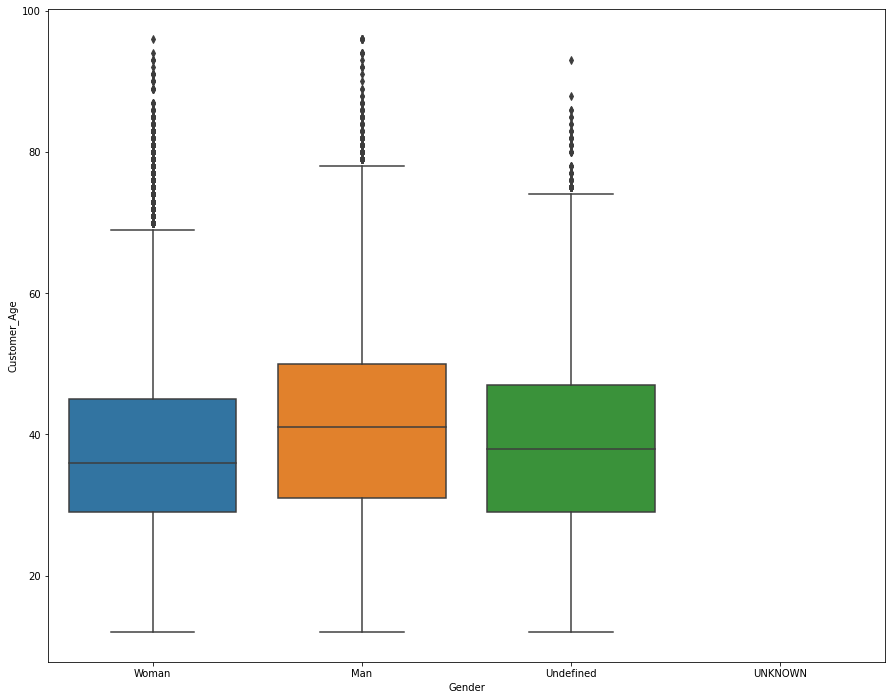

In [13]:
plt.figure(figsize=(15,12))
sb.boxplot(x=emp_df["Gender"],
          y=emp_df["Customer_Age"],
          )

<AxesSubplot:xlabel='Account_Age', ylabel='Customer_Age'>

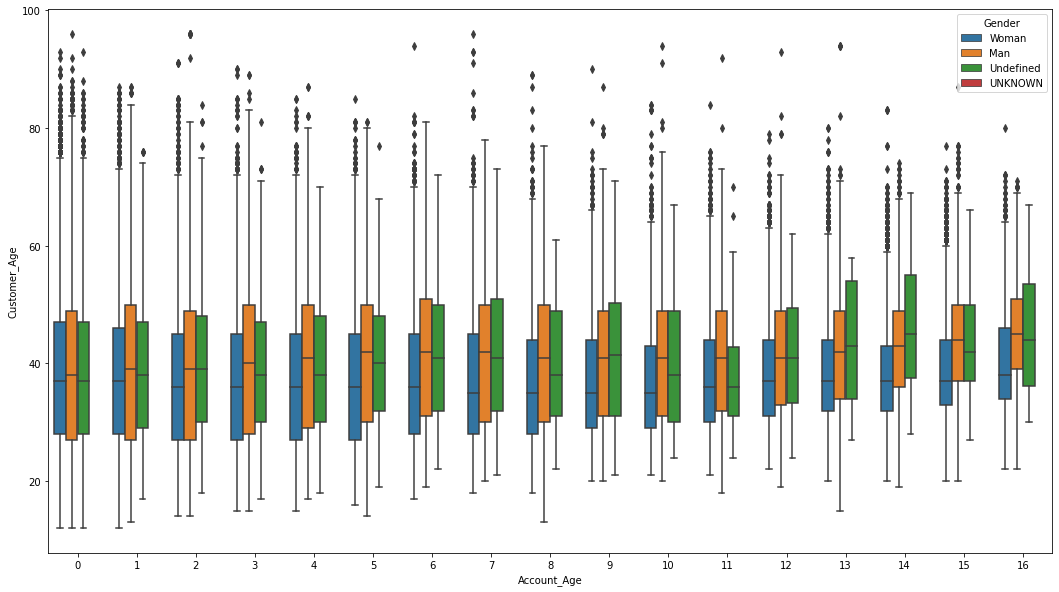

In [14]:
plt.figure(figsize=(18,10))
sb.boxplot(x=emp_df["Account_Age"],
          y=emp_df["Customer_Age"],
          hue=emp_df["Gender"])

In [15]:
def get_bar(col1, col2, order,percentage=False):
    
    df = emp_df[[col1, col2]].value_counts().sort_index().reset_index()
    
    if percentage:
        df = df.groupby(col2).agg({col1: lambda x : [i for i in x],
                         0: lambda x : [round(100*i/sum(x),2) for i in x]})
        df = df.apply(pd.Series.explode).reset_index()
        #print(df)    
    plt.figure(figsize=(20,10))
    #print({round(100 * df.loc[col2].value_counts() / df.loc[col2].shape[0],2)})
    grid = sb.FacetGrid(df, 
                       col= col2,
                       aspect=2,
                       col_wrap=3)
    grid.map(sb.barplot, col1, 0, order=order)

<Figure size 1440x720 with 0 Axes>

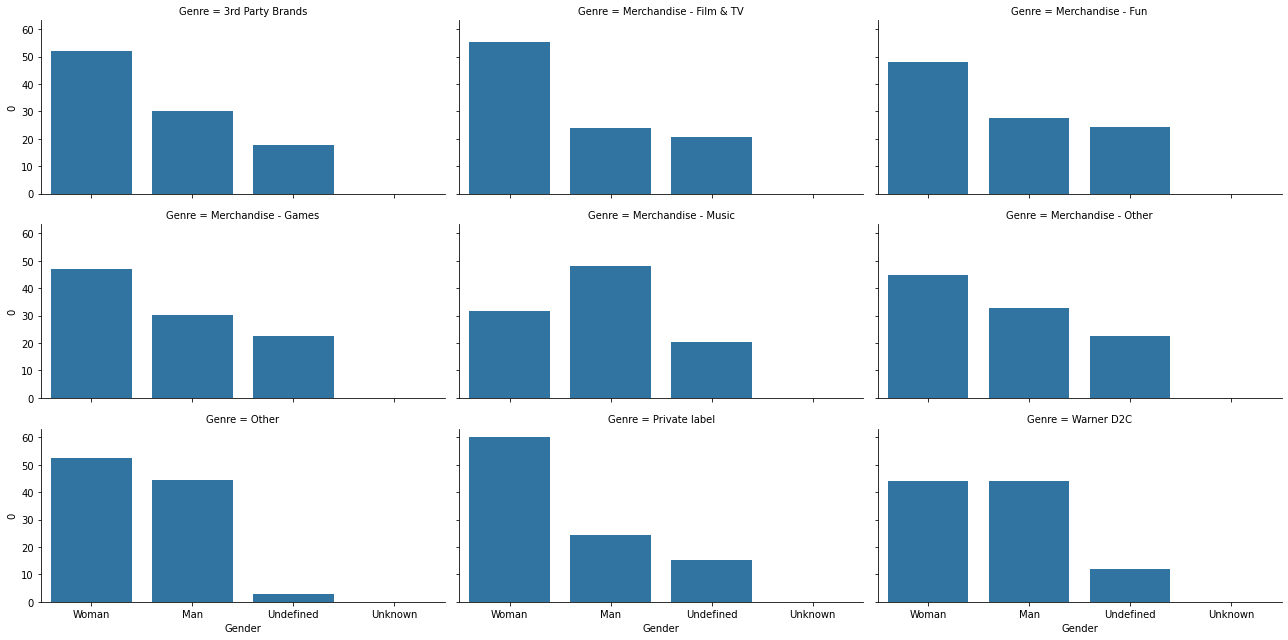

In [16]:
get_bar("Gender",
        "Genre",
        ["Woman", "Man", "Undefined", "Unknown"], 
        percentage=True)

<Figure size 1440x720 with 0 Axes>

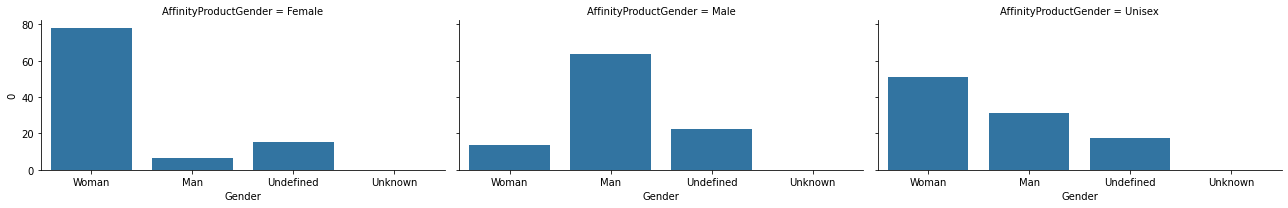

In [17]:
get_bar("Gender",
        "AffinityProductGender",
        ["Woman", "Man", "Undefined", "Unknown"],
        percentage=True)

<Figure size 1440x720 with 0 Axes>

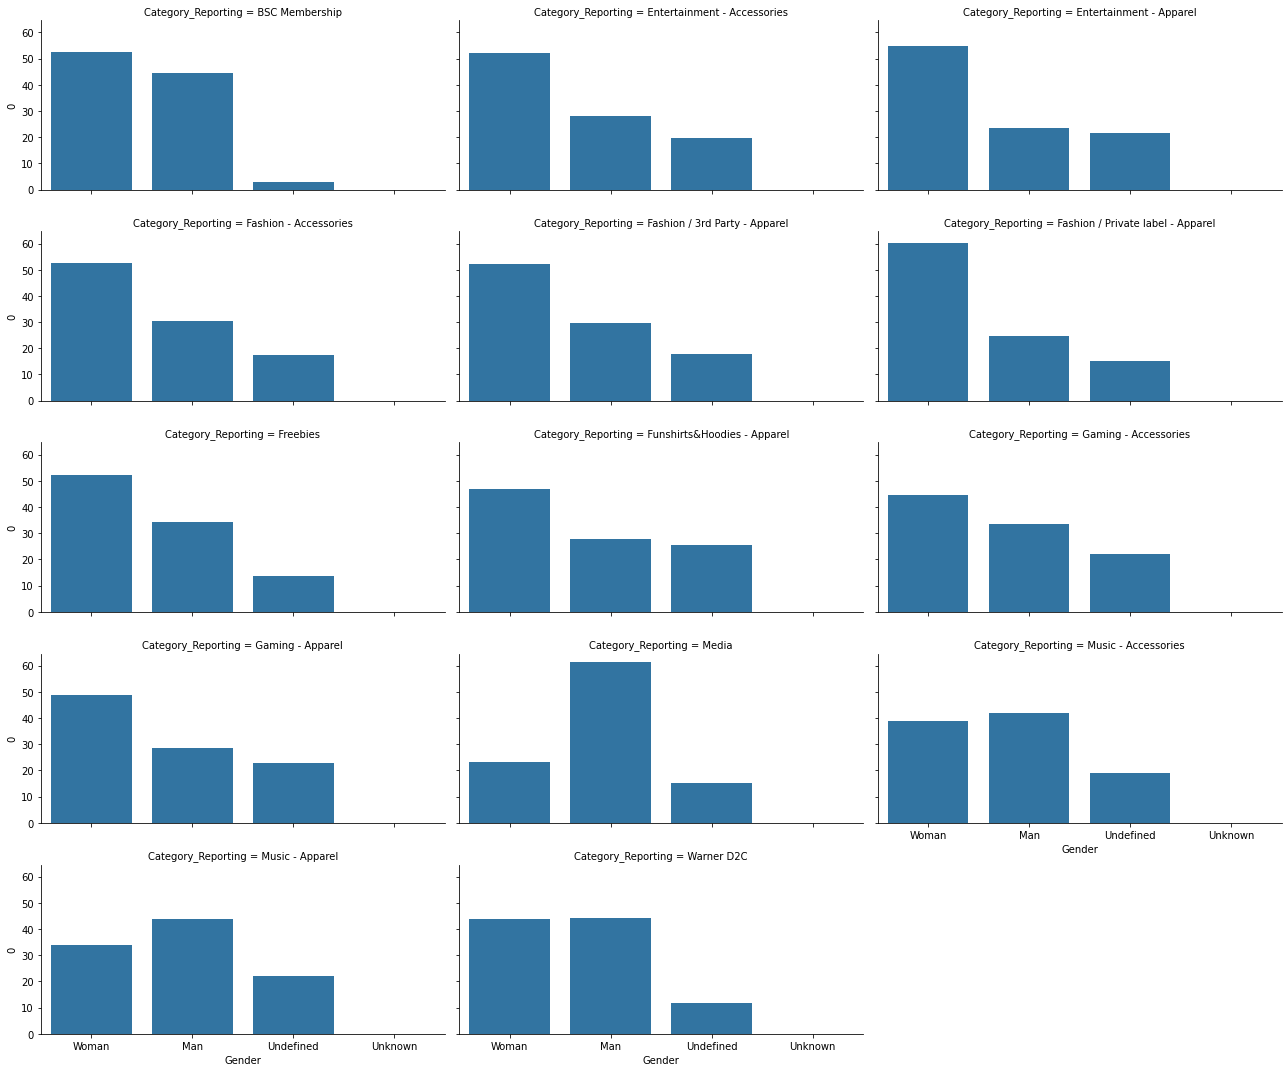

In [18]:
get_bar("Gender",
        "Category_Reporting",
        ["Woman", "Man", "Undefined", "Unknown"],
        percentage=True)

<Figure size 1440x720 with 0 Axes>

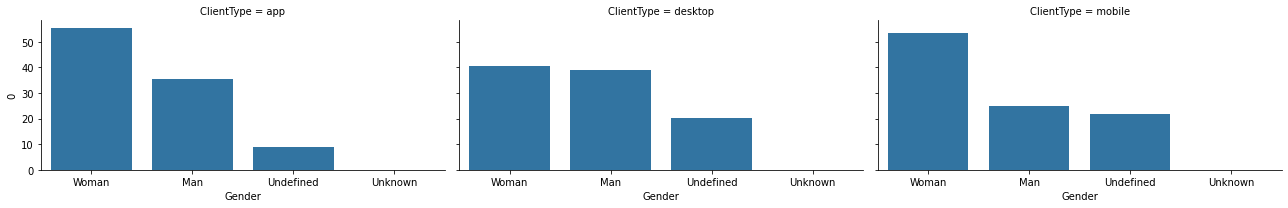

In [19]:
get_bar("Gender",
        "ClientType",
        ["Woman", "Man", "Undefined", "Unknown"],
        percentage=True)

<Figure size 1440x720 with 0 Axes>

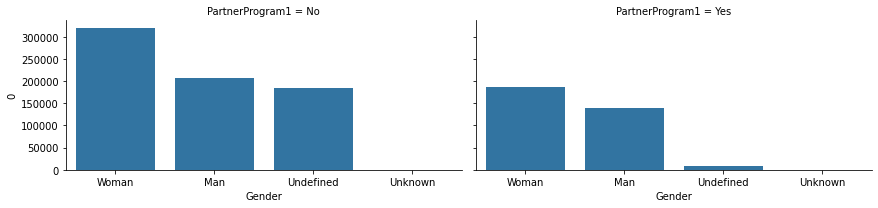

In [20]:
get_bar("Gender",
        "PartnerProgram1",
        ["Woman", "Man", "Undefined", "Unknown"],
        percentage=False)

<Figure size 1440x720 with 0 Axes>

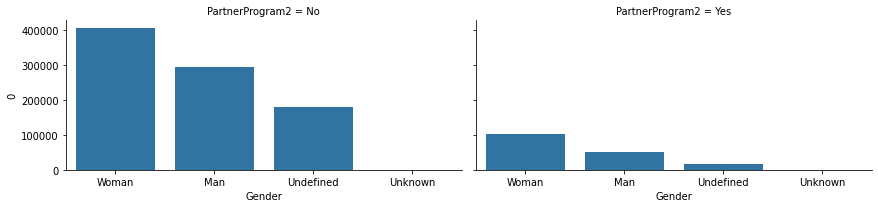

In [21]:
get_bar("Gender",
        "PartnerProgram2",
        ["Woman", "Man", "Undefined", "Unknown"],
        percentage=False)

In [22]:
emp_df.columns

Index(['CustomerHash', 'OrderHash', 'Date_Order', 'Customer_Age', 'Gender',
       'Account_Age', 'AffinityProductGender', 'Category_Reporting', 'Genre',
       'ClientType', 'PartnerProgram1', 'PartnerProgram2', 'FirstOrder',
       'Marketing_Channel', 'Pieces_Ordered', 'Pieces_Outbound',
       'Pieces_Returns', 'Pieces_Fulfilled', 'OrderValue', 'Revenue_Goods',
       'Delivery_Value', 'Return_Value', 'Discount_Total', 'OrderProfit'],
      dtype='object')

In [23]:
emp_df["Date_Order"].min(), emp_df["Date_Order"].max()

(Timestamp('2019-11-10 00:00:00'), Timestamp('2021-05-10 00:00:00'))

In [24]:
emp_df.groupby("Gender")["Pieces_Ordered"].mean()

Gender
Man          2.781502
UNKNOWN      6.714286
Undefined    2.466870
Woman        3.132274
Name: Pieces_Ordered, dtype: float64

In [25]:
order_ts = emp_df.groupby(["Date_Order","Gender"])[["Pieces_Ordered",
                                                    "Pieces_Returns",
                                                    "Pieces_Fulfilled",
                                                    "OrderValue"]].sum().reset_index("Date_Order")

In [26]:
def plt_ts(df, col):
    
    plt.figure(figsize=(18,10))
    sb.lineplot(x=df.loc[col,"Date_Order"],
                y=df.loc[col,"Pieces_Ordered"],
                label="Orders")
    sb.lineplot(x=df.loc[col,"Date_Order"],
                y=df.loc[col,"Pieces_Fulfilled"],
               label="Fulfilled")
    sb.lineplot(x=df.loc[col,"Date_Order"],
                y=df.loc[col,"Pieces_Returns"],
               label="Returns")
    _=plt.title(col)

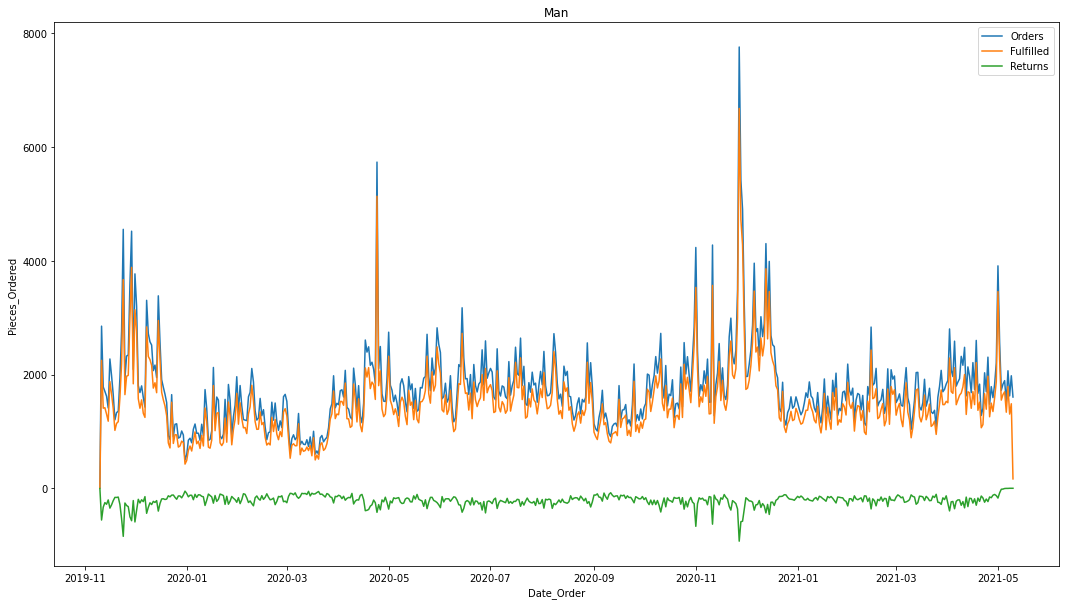

In [27]:
plt_ts(order_ts, 'Man')

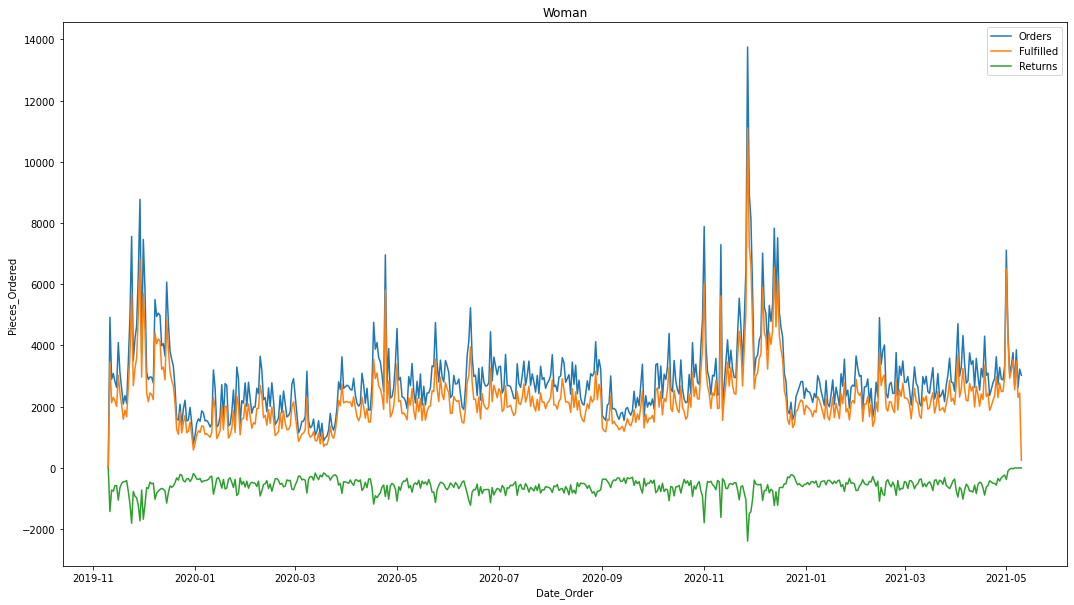

In [28]:
plt_ts(order_ts, 'Woman')

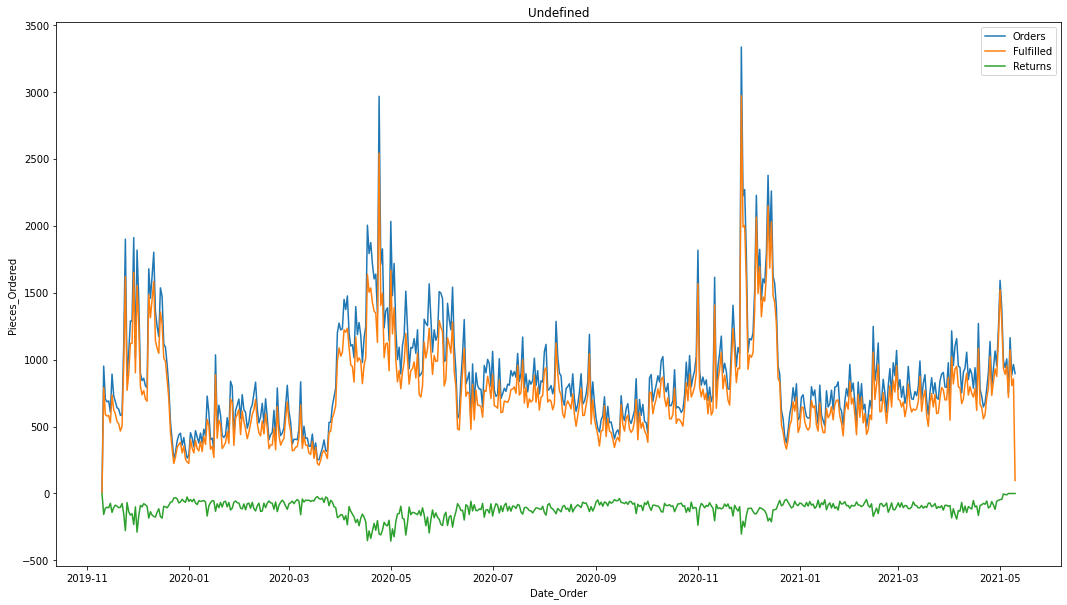

In [29]:
plt_ts(order_ts, 'Undefined')

In [30]:
emp_df["Category_Reporting"].value_counts()

Fashion / 3rd Party - Apparel        193533
Entertainment - Apparel              162271
Music - Apparel                      156649
Fashion / Private label - Apparel    144019
Entertainment - Accessories           77802
Fashion - Accessories                 66367
Media                                 60359
Funshirts&Hoodies - Apparel           58476
BSC Membership                        53048
Music - Accessories                   24371
Gaming - Apparel                      23159
Gaming - Accessories                  14718
Warner D2C                            13554
Freebies                                249
Name: Category_Reporting, dtype: int64

In [31]:
category_ts = emp_df.groupby(["Date_Order","Category_Reporting","Gender"])[["Pieces_Ordered",
                                                    "Pieces_Returns",
                                                    "Pieces_Fulfilled",
                                                    "OrderValue"]].sum().reset_index("Date_Order")

c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


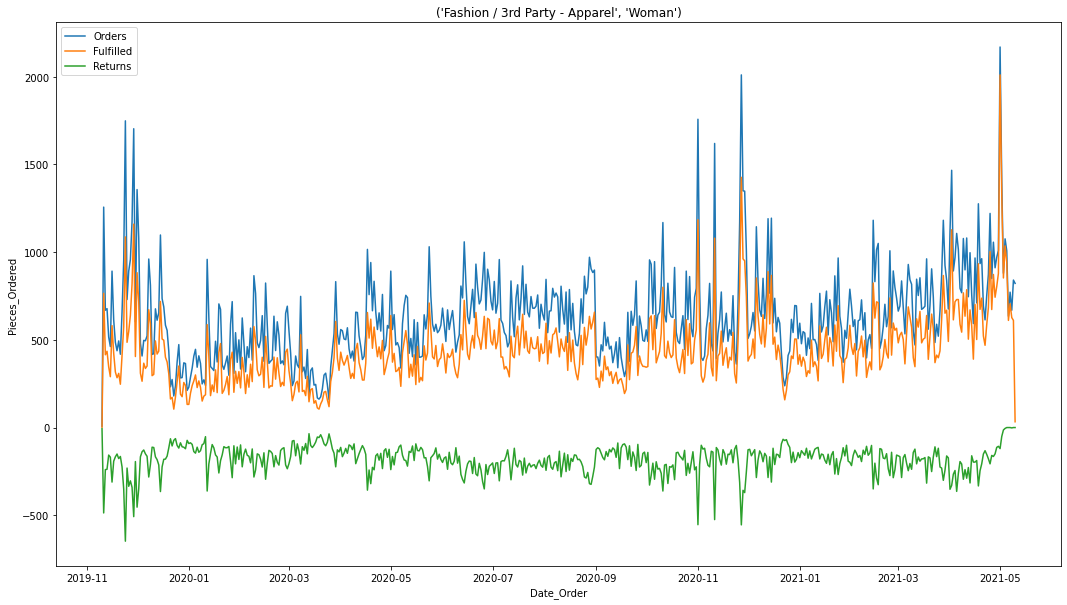

In [32]:
plt_ts(category_ts, ("Fashion / 3rd Party - Apparel","Woman"))

c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


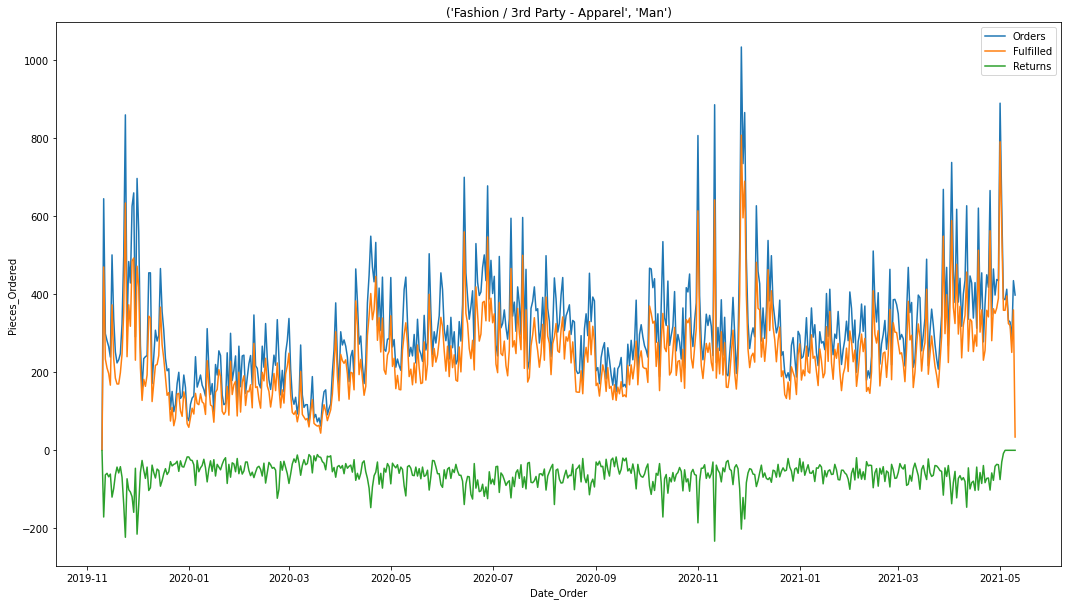

In [33]:
plt_ts(category_ts, ("Fashion / 3rd Party - Apparel","Man"))

c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\pandas\core\indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


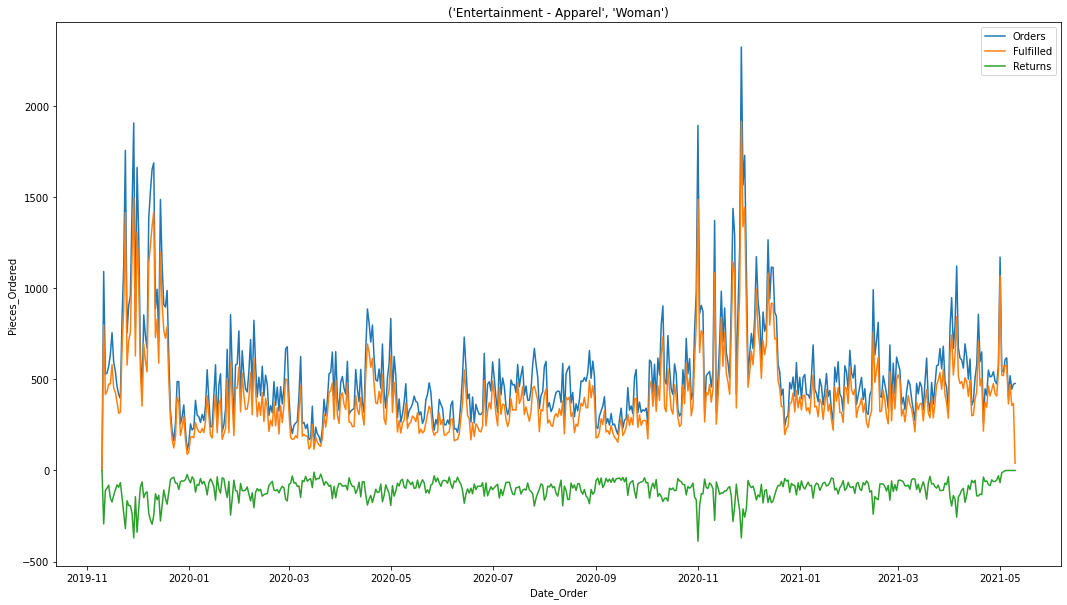

In [34]:
plt_ts(category_ts, ("Entertainment - Apparel","Woman"))

In [81]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [38]:
emp_df

,CustomerHash,OrderHash,Date_Order,Customer_Age,Gender,Account_Age,AffinityProductGender,Category_Reporting,Genre,ClientType,...,Pieces_Ordered,Pieces_Outbound,Pieces_Returns,Pieces_Fulfilled,OrderValue,Revenue_Goods,Delivery_Value,Return_Value,Discount_Total,OrderProfit
0,0x1E1626FECA5B3D07C5BD9809E1C529E64AA416CC,0x7BFC6D3AF3CCB5292515B773D69DC5D84DA7CD60,2020-11-21,33.0,Woman,0,Female,Fashion / Private label - Apparel,Private label,app,...,2,2.0,NaN,2.0,24.3363,24.34,24.34,NaN,-11.85,10.2251
1,0x0A6614AADFF1B528160D2FA0F986391D4FE8AF9E,0xE83E9EBAED365686CEFF9F4F6DF278E9DA35B4A6,2020-03-26,42.0,Woman,4,Unisex,Music - Apparel,Merchandise - Music,mobile,...,1,1.0,NaN,1.0,21.0000,21.00,21.00,NaN,0.00,7.0450
2,0xFA7DAAD0DE71512AE880D307C5AD3FD2940ABAB7,0x9C9784A1194B7DD4A76B0EAD1D144631B2CD1662,2020-04-19,29.0,Woman,1,Female,Entertainment - Apparel,Merchandise - Film & TV,desktop,...,4,4.0,-2.0,2.0,86.3530,42.00,86.36,-44.36,-18.64,16.0117
3,0x19DC7A03794164D3CA88A70FA80EF5AA6E2A8479,0x8BFAE5CA7ED52A5310DA271570E91826B467A19E,2020-10-01,54.0,Man,11,Female,Fashion / Private label - Apparel,Private label,desktop,...,1,1.0,-1.0,0.0,41.9741,0.00,41.97,-41.97,-1.12,-8.0409
4,0x93EE384997774E090DEF62C2B592EF5E9330C714,0xF122A416F2B14C8D7CCA79F4FA623CAEE5671EEC,2021-02-14,39.0,Woman,0,Female,Fashion / 3rd Party - Apparel,3rd Party Brands,mobile,...,5,5.0,NaN,5.0,115.5630,115.56,115.56,NaN,-28.90,59.2625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0x22817FD0BFAA8C4FC6F63AFFF54669B1FCB848C3,0x358731DF4C28ABD5C0864CD9E6D515FA53DB18CB,2019-11-23,NaN,Woman,4,Unisex,Media,Merchandise - Music,mobile,...,1,1.0,NaN,1.0,36.1261,36.13,36.13,NaN,0.00,-24.4230
1048571,0x9FA82DB5353FA9B7AFA1C287C61D74323C65C5C6,0xED6613F94BBA65ACA50F4C09D19DD7D842FE7B28,2020-05-15,53.0,Woman,0,Female,Warner D2C,Warner D2C,mobile,...,4,4.0,NaN,4.0,37.7815,37.77,37.77,NaN,0.00,31.1552
1048572,0xA5BF9E09840FBCB705B4FC2908B10E472FA138E8,0x06A456444702385BF883CDB956072E02E55AC640,2020-10-10,32.0,Man,0,Male,BSC Membership,Other,desktop,...,1,1.0,NaN,1.0,0.0000,0.00,0.00,NaN,-8.58,0.0000
1048573,0xE66CEAC2DA3FEFF87B46F64B3B84BFE672B520D7,0xD16BB2F49840AC968B4AB584D58DEA1AA0500226,2020-08-04,27.0,Woman,3,Female,BSC Membership,Other,desktop,...,1,1.0,NaN,1.0,8.5776,8.58,8.58,NaN,0.00,8.3567


In [40]:
grouped_ts = emp_df.groupby(["Date_Order","Category_Reporting","Gender"])[["Pieces_Ordered",
                                                    "Pieces_Returns",
                                                    "Pieces_Fulfilled",
                                                    "OrderValue"]].sum().reset_index()

In [173]:
grouped_ts["Category_Reporting"].value_counts()

Fashion / Private label - Apparel    1645
Fashion / 3rd Party - Apparel        1644
Music - Apparel                      1644
Fashion - Accessories                1643
Entertainment - Apparel              1643
Funshirts&Hoodies - Apparel          1642
Media                                1642
Entertainment - Accessories          1642
Music - Accessories                  1641
Gaming - Apparel                     1631
Gaming - Accessories                 1620
BSC Membership                       1561
Warner D2C                           1446
Freebies                               54
Name: Category_Reporting, dtype: int64

In [174]:
daily_ts = grouped_ts[grouped_ts["Category_Reporting"] == "Fashion / 3rd Party - Apparel" ].groupby("Date_Order")[["Pieces_Ordered",
                                            "Pieces_Returns",
                                            "Pieces_Fulfilled",
                                            "OrderValue"]].sum()

In [175]:
daily_ts

,Pieces_Ordered,Pieces_Returns,Pieces_Fulfilled,OrderValue
Date_Order,,,,
2019-11-10,12,-7.0,5.0,760.8234
2019-11-11,2115,-732.0,1373.0,66994.6495
2019-11-12,1100,-337.0,744.0,38560.1602
2019-11-13,1055,-315.0,724.0,35025.6896
2019-11-14,869,-243.0,612.0,27833.1790
...,...,...,...,...
2021-05-06,1121,0.0,1089.0,27097.8395
2021-05-07,1350,0.0,1269.0,31262.0938
2021-05-08,1190,-2.0,1097.0,27819.5888


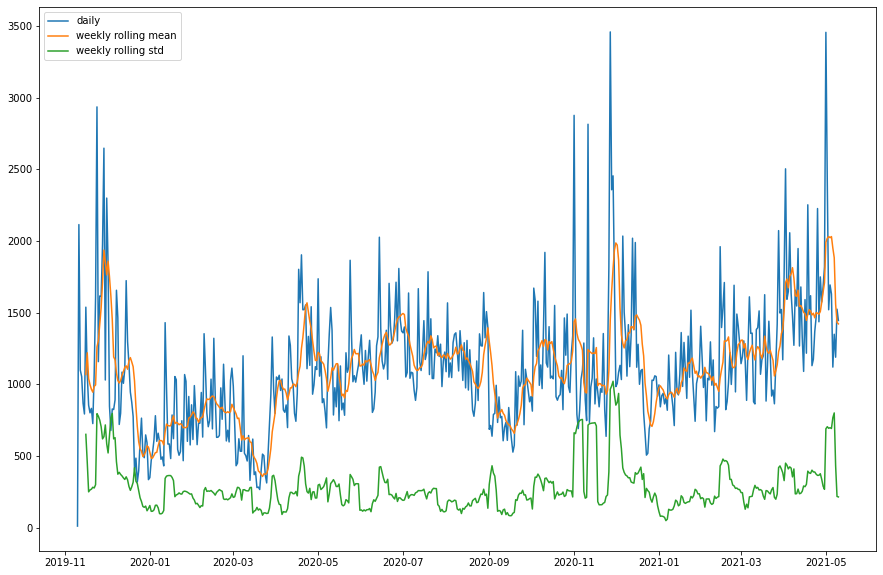

In [177]:
plt.figure(figsize=(15,10))
plt.plot(daily_ts[["Pieces_Ordered"]],label="daily")
plt.plot(daily_ts[["Pieces_Ordered"]].rolling(7).mean(),label="weekly rolling mean")
plt.plot(daily_ts[["Pieces_Ordered"]].rolling(7).std(),label="weekly rolling std")
plt.legend()

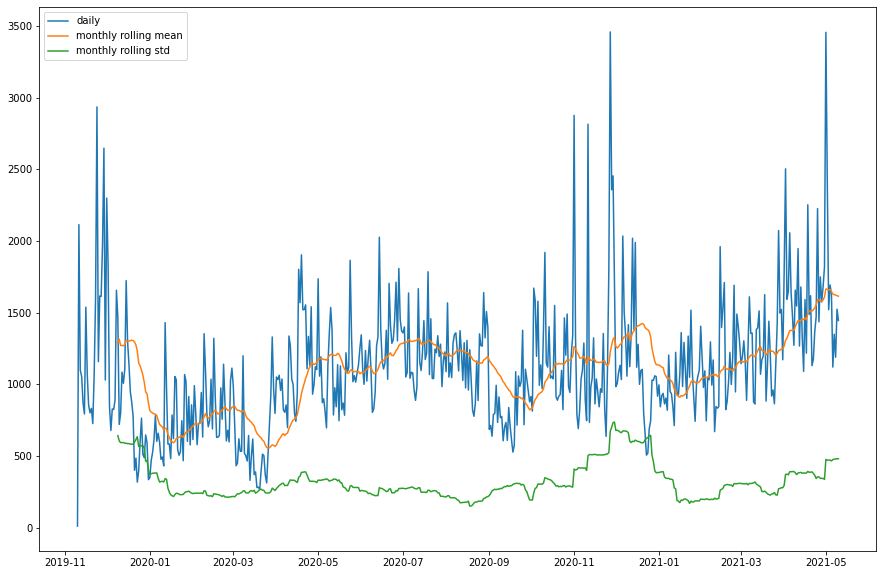

In [178]:
plt.figure(figsize=(15,10))
plt.plot(daily_ts[["Pieces_Ordered"]],label="daily")
plt.plot(daily_ts[["Pieces_Ordered"]].rolling(30).mean(),label="monthly rolling mean")
plt.plot(daily_ts[["Pieces_Ordered"]].rolling(30).std(),label="monthly rolling std")
plt.legend()

In [179]:
decomposed_ts = seasonal_decompose(daily_ts["Pieces_Ordered"])

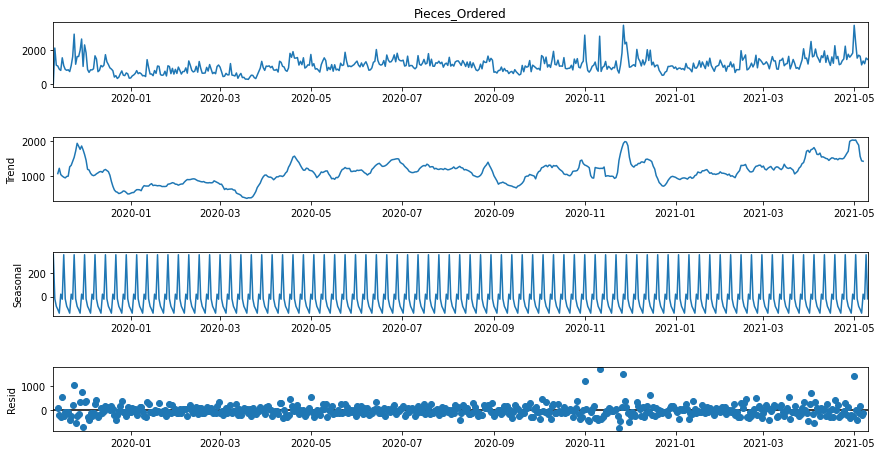

In [180]:
fig = decomposed_ts.plot()
fig.set_size_inches(14,7)

In [181]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

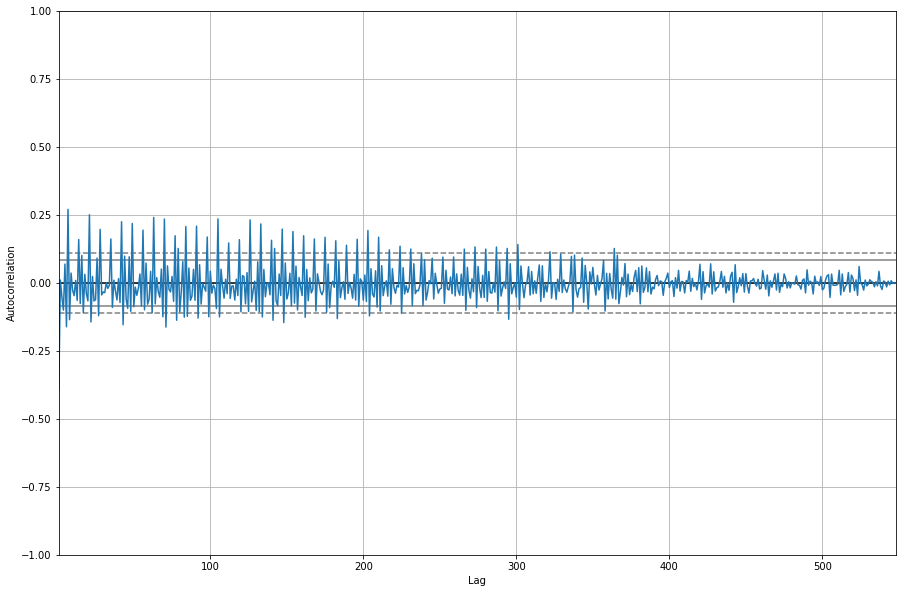

In [192]:
plt.figure(figsize=(15,10))
autocorrelation_plot(daily_ts["Pieces_Ordered"]- daily_ts["Pieces_Ordered"].shift(1).fillna(0))

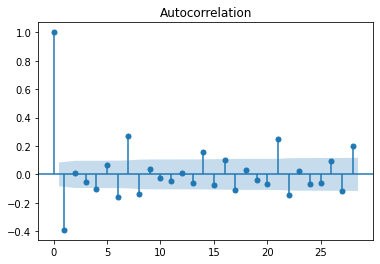

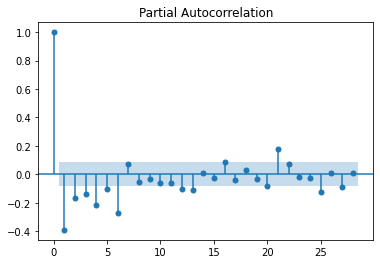

In [187]:
fig = plot_acf(daily_ts["Pieces_Ordered"] - daily_ts["Pieces_Ordered"].shift(1).fillna(0))
fig = plot_pacf(daily_ts["Pieces_Ordered"] - daily_ts["Pieces_Ordered"].shift(1).fillna(0))

In [191]:
adfuller(daily_ts["Pieces_Ordered"])

(-2.5531729672754055,
 0.10306673743112443,
 17,
 530,
 {'1%': -3.4427485933555886,
  '5%': -2.8670087381529723,
  '10%': -2.569682641509434},
 7591.789253572091)

In [188]:
adfuller(daily_ts["Pieces_Ordered"] - daily_ts["Pieces_Ordered"].shift(1).fillna(0))

(-8.864542719416642,
 1.4523597904697727e-14,
 19,
 528,
 {'1%': -3.4427957890025533,
  '5%': -2.867029512430173,
  '10%': -2.5696937122646926},
 7595.010575191926)

In [193]:
model = ARIMA(daily_ts["Pieces_Ordered"], order=(6,1,1))

c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

In [194]:
model = model.fit()

c:\users\dhara\ideaprojects\coding_interviews\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [195]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Pieces_Ordered   No. Observations:                  547
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -3971.141
Method:                       css-mle   S.D. of innovations            343.733
Date:                Mon, 07 Jun 2021   AIC                           7960.283
Time:                        23:09:15   BIC                           7999.023
Sample:                    11-11-2019   HQIC                          7975.425
                         - 05-10-2021                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.9316      4.828      0.193      0.847      -8.531      10.394
ar.L1.D.Pieces_Ordered    -0.8416      0.132     -6.368      0.000      -1.101      -0.583
ar.L2.D.Pieces_Ordered    -0.5364      0.086     -6.265      0.000      -0.704      -0.369
ar.L3.D.Pieces_Ordered    -0.4389      0.066     -6.655      0.000      -0.568      -0.310
ar.L4.D.Pieces_Ordered    -0.4414      0.063     -6.988      0.000      -0.565      -0.318
ar.L5.D.Pieces_Ordered    -0.3341      0.061     -5.512      0.000      -0.453      -0.215
ar.L6.D.Pieces_Ordered    -0.3187      0.042     -7.669      0.000      -0.400      -0.237
ma.L1.D.Pieces_Ordered     0.2801      0.140      2.005      0.045       0.006       0.554
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7995           -0.9139j            1.2143           -0.1356
AR.2            0.7995           +0.9139j            1.2143            0.1356
AR.3           -1.0297           -0.5083j            1.1484           -0.4270
AR.4           -1.0297           +0.5083j            1.1484            0.4270
AR.5           -0.2941           -1.2359j            1.2704           -0.2872
AR.6           -0.2941           +1.2359j            1.2704            0.2872
MA.1           -3.5704           +0.0000j            3.5704            0.5000
-----------------------------------------------------------------------------
"""

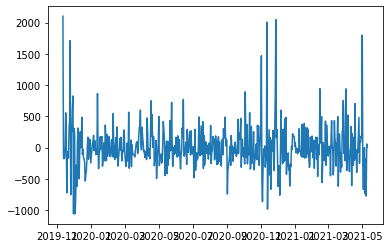

In [196]:
plt.plot(model.resid)

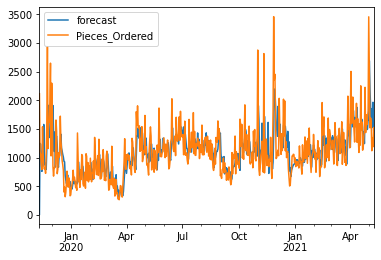

In [197]:
_ = model.plot_predict()

In [224]:
forecast_offset= 20

forecast_v , se, forecast_ci = model.forecast(forecast_offset)

In [225]:
lci = forecast_ci[:,0]
uci = forecast_ci[:,1]

In [226]:
predicted = model.predict()
predicted = predicted + daily_ts["Pieces_Ordered"].shift(1)

In [227]:
forecast_dt_ix = predicted.tail(forecast_offset).index + pd.DateOffset(forecast_offset)
forecast_v = pd.Series(forecast_v, index = forecast_dt_ix)
lci = pd.Series(lci, index = forecast_dt_ix)
uci = pd.Series(uci, index = forecast_dt_ix)
predicted_forecasted = pd.concat((predicted,forecast_v), axis=0)

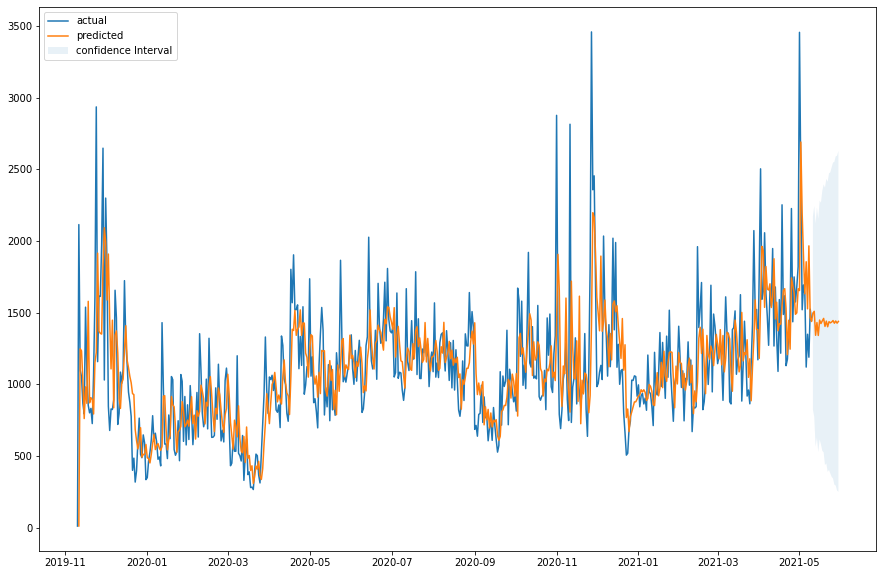

In [228]:
plt.figure(figsize=(15,10))
plt.plot(daily_ts['Pieces_Ordered'], label="actual")
plt.plot(predicted_forecasted, label="predicted")
plt.fill_between(lci.index,lci, uci, alpha=0.1, label="confidence Interval")
plt.legend()